In [46]:
#importing necessary libraries
# we need numpy and pandas
import numpy as np
import pandas as pd

In [47]:
# this is a class to define the functions
# basically, I am declaring the functions here, and later the definations are written

class Module:

# parameters are defined and returned as an array

    def parameters(self):
        """
        Returns list of its parameters
        """
        return []

#initializing the training samples

    def __init__(self):
        self._train = True

# declaring backpropagation
# method
# it takes the inputs, 
#and returns the output

    def backward(self, input, grad_output):
        raise NotImplementedError    
    
# forward propagation will 
#only take the input 
#but will not give any output

    def forward(self, input):
        raise NotImplementedError

# This is for gradient descent method
    def grad_parameters(self):
        """
        Returns list of tensors gradients of its parameters
        """
        return []

# this is for evaluation function
    def eval(self):
        self._train = False

# this is fro training
    def train(self):
        self._train = True



In [48]:
# this is the criterion class, this is just to show the loss of the model
# here I defined
# forward and backward methods
# later I will assign this to cross entropy
# just for my convinience I have made this class.
class Criterion:
    def forward(self, input, target):
        raise NotImplementedError

    def backward(self, input, target):
        raise NotImplementedError

In [49]:
#class for a linear layer:
# no. of nodes in the first layer as first argument.
# no. of nodes in the next connecting layer as second argument.

class Linear(Module):

  # defining initialization steps
  #self, input no. of nodes
  #op no. of nodes are given as inputs

    def __init__(self, dim_in, dim_out):
        #super function here will refer to the init function of module class.
        super().__init__()
        # Using Xavier/Glorot's Initialization using Uniform Distribution 
        F_in = dim_in
        F_out = dim_out
        a=6
        limit = np.sqrt(a / float(F_out + F_in))
        # here randomly initializing weights
        s=0.0
        self.W = np.random.normal(s, limit, size=(F_in, F_out))
        # self.W = np.random.randn(dim_in, dim_out)
        # randomly initializing biases also
        q=1
        self.b = np.random.randn(q, dim_out)

# calculates : Y = W.X + b, where W is weight matrix, X is input feature and b is vector bias.
    def forward(self, input):
        # y=wx+b is the formula in forward pass.
        # so calculating the dot product of weights and inputs
        # then adding this to biases
        c=np.dot(input, self.W)
        self.output = (c + self.b)
        return self.output

 # function to calculate backpropagation loss, after calculating the gradients
    def backward(self, input, grad_output):
        # simply calculating the new weights and biases      
        g=0
        self.grad_b = np.mean(grad_output, axis=g)
        # new biases is just the mean of the existing biases
        self.grad_W = np.dot(input.T, grad_output)
        # new weights are the dot product of weights and gradients divided by the input shape

        self.grad_W /= input.shape[g]
        # finally the new gradient becomes, the dot product of the existing gradient and the weight matrix transpose

        grad_input = np.dot(grad_output, self.W.T)
        return grad_input

#return list of parameters
    def parameters(self):
        return [self.W, self.b]

#return list of gradient parameters
    def grad_parameters(self):
        return [self.grad_W, self.grad_b]

In [50]:
# softmax function takes input values, 
#normalizes them and results probabilities 
#that will sum upto a total of 1.
# softmax is an activation function 
#used in the output layer

def softmax(xs):
    k=1
    df=xs.max(axis=k, keepdims=True)
    #subtacting df from xs
    xs = np.subtract(xs,df)
    # taking the exponent of xs
    v= np.exp(xs)
    #now adding all the exponents
    b=np.sum(np.exp(xs), axis=1, keepdims=True)
    #now divin=ding v with b
    xs = v / b
    # returning this xs.
    return xs


In [51]:

# It is a loss criterion. Also called log loss, 
# in which predicted probabilities of a class are compared with desired class and loss 
# is calculated by penalizing the probability based on how far it is from the actual expected value.

class CrossEntropy(Criterion):
    def __init__(self):
      # it refers to upper init function.
        super().__init__()

    #loss calculation for forward pass
    def forward(self, input, target):
        f=9
        eps = 1e-9
        u=0
        predictions = np.clip(input, eps, 1. - eps)
        N = predictions.shape[u]
        ce = -np.sum(target * np.log(predictions))
        return ce / N

# loss for backward pass
    def backward(self, input, target):
        eps = 1e-9
        input_clamp = np.clip(input, eps, 1 - eps)
        return softmax(input_clamp) - target

In [52]:
# This class helps us in developing neural network as a sequnce of layers and activation layers
# passig module as input to this function

class Sequential(Module):
  # no. of layers are also given as input

    def __init__(self, *layers):
        super().__init__()
        self.layers = layers
        #layrs and input layers are declared

    def forward(self, input):
        for layer in self.layers:
            # running a loop to travrse through all the layers
            input = layer.forward(input)
            #output is set to input
        self.output = input
        return self.output

    #defining backward pass
    def backward(self, input, grad_output):
        # running a loop to travrse through all the layers
        for i in range(len(self.layers) - 1, 0, -1):
            grad_output = self.layers[i].backward(self.layers[i-1].output, grad_output)
            #taking backward function for layers of i-1 and gradient output
            #again refering above layersfor that
        grad_output = self.layers[0].backward(input, grad_output)
        #here, taking input and gradient output as inputs to backward pass.
        return grad_output

#defining parameters.

    def parameters(self):
        #creating an empty array for result
        res = []
        # running a loop to travrse through all the layers
        for l in self.layers:
            # adding the parameters to the result array
            res += l.parameters()
        return res
        # returning the result array

# defining gradient parameters
    def grad_parameters(self):
        res = []
         #creating an empty array for result
        for l in self.layers:
           # running a loop to travrse through all the layers
            res += l.grad_parameters()
        return res
        # adding the parameters to the result array
        # returning the result array

#defining training set
    def train(self):
        # running a loop to travrse through all the layers
        for layer in self.layers:
            layer.train()
            # for every layer, we are training the model

#defining evaluation 
    def eval(self):
        for layer in self.layers:
            # running a loop to travrse through all the layers
            layer.eval()
      # evaluating the model
    

In [53]:
# sigmoid describes the sigmoid activation function by adding non-linearity

def sigmoid(x):
    c=1 
    s=np.exp(-x)
    g=c+s
    k=c/g
    return k

# sigmoid_der helps to calculate the derivative of the input feature
def sigmoid_der(x):
      j=sigmoid(x)
      b=1
      g=(b - sigmoid(x))
      val = j * g
      return val

# sigmoid class helps in applying the sigmoid activation function to the given input values using forward_pass function.
# helps calculate gradients in the backpropagation function

class Sigmoid(Module):
    def __init__(self):
        super().__init__()

    def forward(self, input):
        # running a loop to travrse through all the layers
        self.output = sigmoid(input)
        return self.output

    def backward(self, input, grad_output):
        # running a loop to travrse through all the layers
        grad_input = sigmoid_der(input) * grad_output
        return grad_input


    def parameters(self):
        return []
    
    def gradient_parameters(self):
        return []

    def train(self):
        self._train = True

    def evaluate(self):
        self._train = False


In [72]:
#this is the activation function for outer layer
class SoftMax(Module):
    def __init__(self):
        super().__init__()

# activation for outer layer forward pass
    def forward(self, input):
        l=1
        k=input.max(axis=l, keepdims=True)
        #taking the input max as k
        self.output = np.subtract(input,input.max(axis=l, keepdims=True))
        #then taking out exponential of output
        b=np.exp(self.output)
        #then taking sum 
        m=np.sum(b, axis=l, keepdims=True)
        self.output = b/m
        return self.output


#for backward pass
    def backward(self, input, grad_output):
        return grad_output

# for parameters defination
    def parameters(self):
        return []
    
    def gradient_parameters(self):
        return []

#defining training and evaluation functions
    def train(self):
        self._train = True

    def evaluate(self):
        self._train = False



In [73]:

# Dataloader function takes in the X_train and y_train along with batch sizes
# it creates an array named indices which stores all the index values serially and this array is used to slice
# the input data (X_train) into appropriate batch sizes
# Function returns the ending X and Y values for a given batch size 
m=34
def DataLoader(X, Y, batch_size=m):
    v=0
    n = X.shape[v]
    indices = np.arange(n)
    np.random.shuffle(indices)
    # shuffling the indices randomly
    h=0
    for start in range(h, n, batch_size):
        g=start + batch_size
        end = min(g , n)
        # minimum of g and n is assigned end 
        batch_idx = indices[start:end]
        #batch indices are from start to end
        yield X[batch_idx], Y[batch_idx]
        # print or retrieve the x and y of that particular batch index.

Accuracy and loss functions

In [74]:
# Accuracy is calculated in this function, by taking the difference between Y_true and Y_predicted.

def accuracy_score(y_true, y_pred):
    j=1
    a = np.argmax(y_true, axis=j)
    b = np.argmax(y_pred, axis=j)
    # a is the true label
    #b is the predicted label
    # if both are equal, adding that count to c
    # d is the size of the dataset
    # so, dividing both will give total correctly predicted count, which is the accuracy
    c=np.count_nonzero(a == b)
    d=y_true.shape[0]
    v=c/d
    return v

In [75]:
# gradientdescent optimizer is used in this program.
# gradientdescent optimizer accounts both momentum and RMSprop for optimization.
# gradient descent optimizer is known to do the best smoothening of irregularities to attain global minima

class graddescent:
    def __init__(self, model):
        # initializing prev_m and v as none
        # self.model=model
        self.prev_m = None
        self.prev_v = None
        self.model = model
        # self.t=1
        self.t = 1

 #  lr represents the learning rate for the optimizer, b1 and b2 are used in gradientdescent optimizer
    # generally lr is 0.001
    
    def step(self, lr):
        b1=0.9
        b2=0.999
        # initializing b1 abd b2 as 0.9, 0.999
        # inializing m and v temp arrays as empty
        prev_m_tmp = []
        prev_v_tmp = []
        # eps as 1e-7..1-10^7
        eps = 1e-7
        
        #loop variables as i and weights and gradients
        for i, (weights, gradient) in enumerate(zip(self.model.parameters(), self.model.grad_parameters())):
            
            #for non initial values, do this kind of updation
            if self.prev_m and self.prev_v:
                
                m = b1 * self.prev_m[i] + (1 - b1) * gradient
                v = b2 * self.prev_v[i] + (1 - b2) * gradient ** 2
                m_hat = m / (1 - b1 ** self.t)
                v_hat = v / (1 - b2 ** self.t)
            else:
                m = b1 * 0 + (1 - b1) * gradient
                v = b2 * 0 + (1 - b2) * gradient ** 2
                m_hat = m / (1 - b1 ** self.t)
                v_hat = v / (1 - b2 ** self.t)

            weights -= lr * m_hat / (np.sqrt(v_hat) + eps)

            prev_m_tmp.append(m)
            prev_v_tmp.append(v)

        self.prev_m = prev_m_tmp
        self.prev_v = prev_v_tmp

        self.t += 1

Importing dataset
and training the model on it.

In [13]:
#importing libraries that are needed
# train test split for standard split
#importing files from google colab, to import dataset
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()


Saving mnist_train.csv to mnist_train.csv


In [14]:
#importing io to read the csv file
import io
df = pd.read_csv(io.BytesIO(uploaded['mnist_train.csv']))
# printing the top 5 rows using head()
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# from sklearn.model_selection import train_test_split
# taking the data from 2nd column, because 1st column is just the serial nmber.
# converting everything to nummpy array, for easy processing data
X, y = df.iloc[:, 1:].to_numpy(), pd.get_dummies(df.iloc[:, 0]).to_numpy()
#given train test split as 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# to plot, we use matplotlib.pyplot library
import matplotlib.pyplot as plt

In [88]:

# taking inputs like epochs, 
#number of input nodes,
#no. of hidden nodes
#learning rate
# and then setting Cross Entropy as loss function 
#and initilizing constructor for Class Optimizer
# however the no. of layers are fixed as per the question
# as 1 hidden layer, one input and one output layer
print("Enter the following details:")
epochs = int(input("1. Epochs "))
print("Enter no. of Input nodes:")
N= int(input("2. Input nodes "))
print("Enter no. of hidden nodes:")
h= int(input("3. Hidden Nodes "))
lr = float(input("4. Learing Rate "))


model = Sequential(
    Linear(N, h),
    Sigmoid(),

   # Linear(10, 10),
   #Sigmoid(),

    #Linear(10, 10),
    #Sigmoid(),

    #Linear(10, 10),
    #Sigmoid(),

    Linear(h, 10),
    SoftMax(),
)

evaluate_every = 1
#criterion for loss calculation, I used cross entropy function for that
criterion = CrossEntropy()
# optimizer is gradient descent
optimizer = graddescent(model)
# so, simply inializing the values

#epochs = 35
eval_every = 1
batch_size = 1024
#criterion = CrossEntropy()

# creating an empty array
# to store the accuracy values of training and testing data separately for every epoch
# inorder to plot the curve for epoch vs accuracy
acc_train=[]
acc_test=[]


# creating an empty array
# to store the loss values of training and testing data separately for every epoch
# inorder to plot the curve for epoch vs loss
train_loss=[]
test_loss=[]

#for every epoch, we are training the model,
# predicting the values or labels in forward pass
# then updating them in backwardpass
# then optimizing it by taking the learning rate as input
for epoch in range(epochs):
    
    for x, y in DataLoader(X_train, y_train, batch_size=batch_size):
        model.train()
        y_pred = model.forward(x)
        grad = criterion.backward(y_pred, y)
        model.backward(x, grad)
        optimizer.step(lr)

#now, we sent all the parameters to the respective functions 
# next step would be to calculate the loss and accuracy for eaach pass.
# for this, prediction is doe by the model. 
# so sending xtrain and xtest to the foward pass of the model.
# loss would be generated from the crossentropy function , which I assigned to criterion. So calculating loss from there. 
#separately for trai and test samples.
# printing them for each epoch separately.

    if (epoch + 1) % eval_every == 0:
        model.eval()
        y_train_pred = model.forward(X_train)
        y_test_pred = model.forward(X_test)
        loss_train = criterion.forward(y_train_pred, y_train)
        loss_test = criterion.forward(y_test_pred, y_test)
        print(f'Epoch: {epoch + 1}/{epochs}')
        print(f'Train Loss: {loss_train} Train Accuracy: {accuracy_score(y_train, y_train_pred)}')
        print(f'Test Loss: {loss_test} Test Accuracy: {accuracy_score(y_test, y_test_pred)} \n')

# since we need all the accuracy and losses values inorder to plot the curves, 
# I appended all these values to an array for every epoch.
# will use these arrays in the next step       
        acc_train.append(accuracy_score(y_train, y_train_pred))        
        acc_test.append(accuracy_score(y_test, y_test_pred))

        train_loss.append(loss_train)
        test_loss.append(loss_test)

print("\n")
print(acc_train)
print(acc_test)
# printing them just to check
print("\n")
print(train_loss)
print(test_loss)

Enter the following details:
1. Epochs 20
Enter no. of Input nodes:
2. Input nodes 784
Enter no. of hidden nodes:
3. Hidden Nodes 10
4. Learing Rate 0.001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Epoch: 1/20
Train Loss: 2.707439853013695 Train Accuracy: 0.2441875
Test Loss: 2.684879409526145 Test Accuracy: 0.24341666666666667 

Epoch: 2/20
Train Loss: 2.31322144215362 Train Accuracy: 0.2940625
Test Loss: 2.294557385487184 Test Accuracy: 0.2961666666666667 

Epoch: 3/20
Train Loss: 1.9622694668345864 Train Accuracy: 0.3796041666666667
Test Loss: 1.9467971693662371 Test Accuracy: 0.3844166666666667 

Epoch: 4/20
Train Loss: 1.8026465584915996 Train Accuracy: 0.445375
Test Loss: 1.7923140382270337 Test Accuracy: 0.448 

Epoch: 5/20
Train Loss: 1.6704105269035308 Train Accuracy: 0.46758333333333335
Test Loss: 1.6583056441168353 Test Accuracy: 0.4723333333333333 

Epoch: 6/20
Train Loss: 1.5798605377676422 Train Accuracy: 0.4881875
Test Loss: 1.5659690073455284 Test Accuracy: 0.4979166666666667 

Epoch: 7/20
Train Loss: 1.495647909640512 Train Accuracy: 0.5952083333333333
Test Loss: 1.492042341911315 Test Accuracy: 0.5976666666666667 

Epoch: 8/20
Train Loss: 1.3884661261947473 Trai




Accuracy vs Epochs


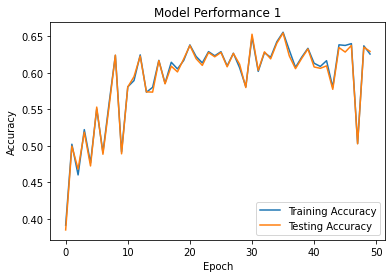




Loss vs Epochs


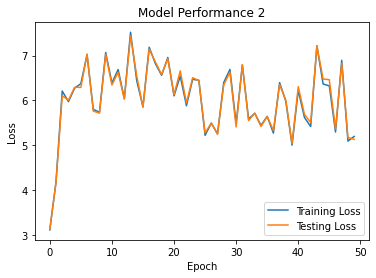

In [86]:
print("\n\n")
# plot for accuracy vs epoch
print("Accuracy vs Epochs")
plt.title('Model Performance 1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc_train,label = "Training Accuracy")
plt.plot(acc_test,label = "Testing Accuracy")
plt.legend()
plt.show()

print("\n\n")
#plot for loss vs epoch
print("Loss vs Epochs")
plt.title('Model Performance 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss,label = "Training Loss")
plt.plot(test_loss,label = "Testing Loss")
plt.legend()
plt.show()